# Emotional Speech Detection

# Pre-Processing

## Import Dataset

In [1]:
!echo '{"username":"ariffaizin","key":"9c3c17b1c9f2112ceb774af06e41e16c"}' > kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change permission
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess --force

 94% 402M/428M [00:01<00:00, 301MB/s]
100% 428M/428M [00:01<00:00, 269MB/s]


In [2]:
import zipfile,os
test_zip = 'toronto-emotional-speech-set-tess.zip'
zip_ref2 = zipfile.ZipFile(test_zip, 'r')
zip_ref2.extractall()
zip_ref2.close()

## Import Module


In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns # for plotting
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

In [4]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [5]:
len(paths)

2800

In [6]:
paths[:5]

['/content/TESS Toronto emotional speech set data/YAF_sad/YAF_wash_sad.wav',
 '/content/TESS Toronto emotional speech set data/YAF_sad/YAF_white_sad.wav',
 '/content/TESS Toronto emotional speech set data/YAF_sad/YAF_bought_sad.wav',
 '/content/TESS Toronto emotional speech set data/YAF_sad/YAF_ripe_sad.wav',
 '/content/TESS Toronto emotional speech set data/YAF_sad/YAF_ring_sad.wav']

In [7]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [8]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,sad
1,/content/TESS Toronto emotional speech set dat...,sad
2,/content/TESS Toronto emotional speech set dat...,sad
3,/content/TESS Toronto emotional speech set dat...,sad
4,/content/TESS Toronto emotional speech set dat...,sad


In [9]:
df['label'].value_counts()

sad        400
happy      400
ps         400
disgust    400
neutral    400
fear       400
angry      400
Name: label, dtype: int64

# Exploratory Data Analysis

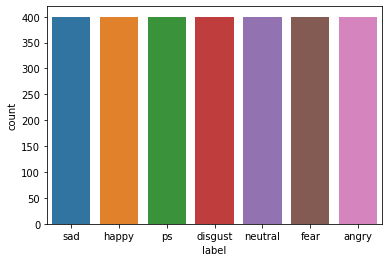

In [10]:
sns.countplot(df['label'])

In [11]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

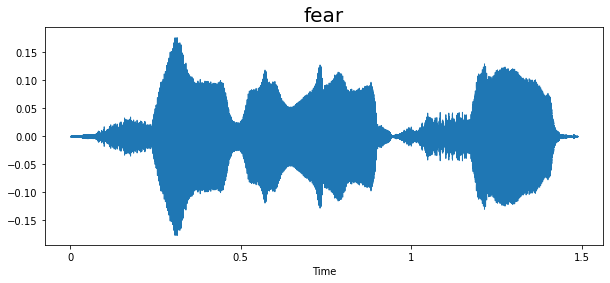

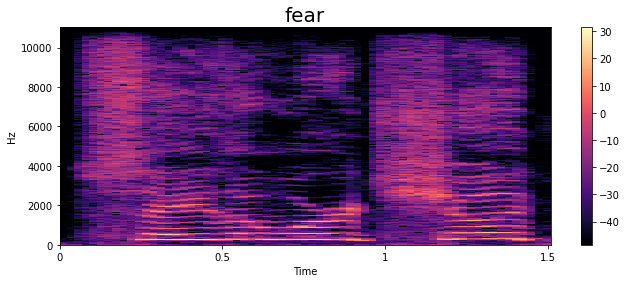

In [12]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

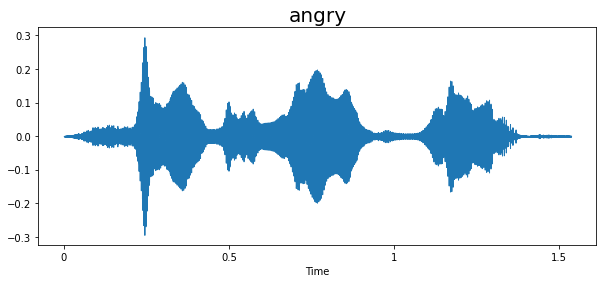

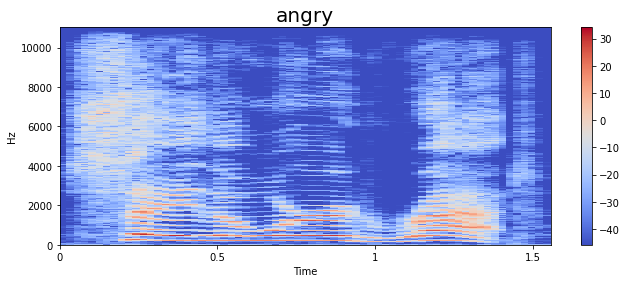

In [13]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

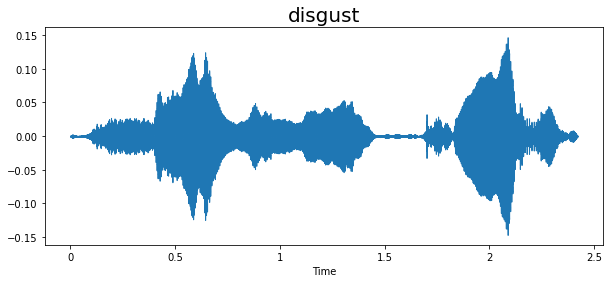

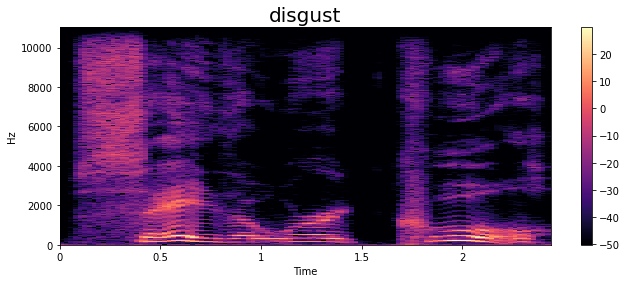

In [14]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

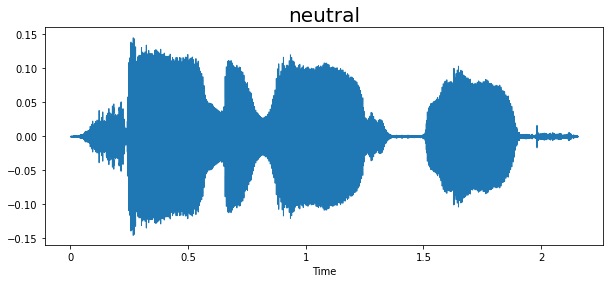

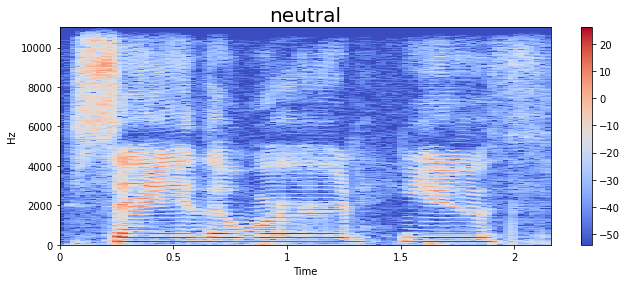

In [15]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

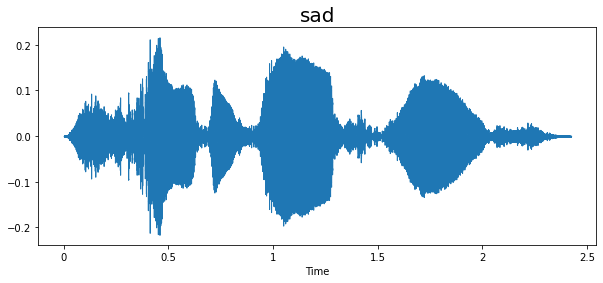

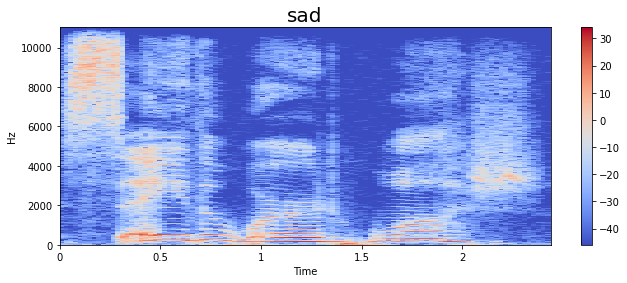

In [16]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

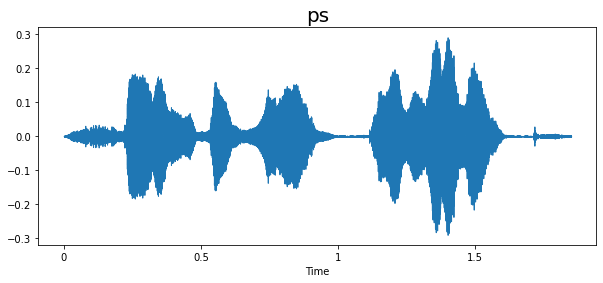

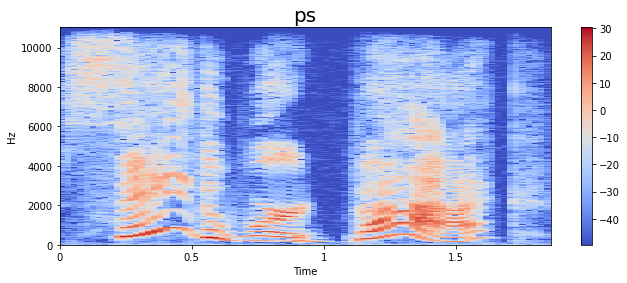

In [17]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

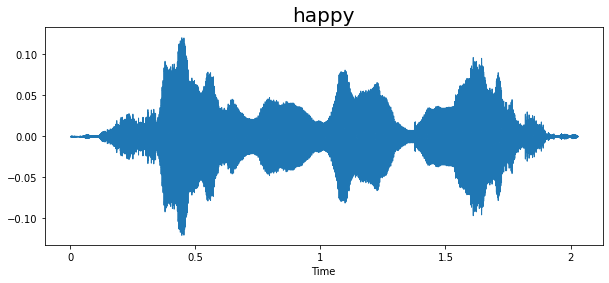

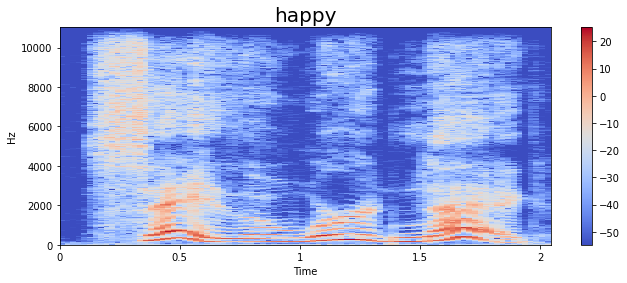

In [18]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

In [19]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [20]:
extract_mfcc(df['speech'][0])

array([-4.0860440e+02,  8.6169472e+01,  2.0731850e+01,  3.7512970e+01,
       -7.2647839e+00,  9.4389038e+00,  9.3102045e+00, -9.2039375e+00,
       -1.8229048e+00,  1.8939023e+00, -6.6698637e+00,  5.0269848e-01,
       -5.5651770e+00,  1.0297931e+01, -1.2060854e+01,  1.4775673e+00,
       -3.3841627e+00, -4.0569530e+00, -3.4995925e+00, -4.7503076e+00,
       -6.4848752e+00, -3.1053290e+00, -7.1141057e+00,  3.4524779e+00,
       -3.3502860e+00,  5.9477501e+00,  2.1753545e+00, -2.8740734e-01,
       -3.3882859e+00, -9.9501866e-01, -5.0606117e+00,  7.9880571e+00,
        3.0775023e+00,  1.0461616e+01,  5.9930267e+00,  6.8094749e+00,
        5.4663320e+00,  7.6895628e+00,  6.1062226e+00,  8.0300303e+00],
      dtype=float32)

In [21]:
# use GPU if available
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU Not found!')
  X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
else:
  print('GPU found!')
  with tf.device('/device:GPU:0'):
    X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

GPU found!


In [22]:
X_mfcc

0       [-408.6044, 86.16947, 20.73185, 37.51297, -7.2...
1       [-424.28748, 95.87112, 32.77333, 37.764526, -5...
2       [-509.8395, 103.36203, 35.059265, 28.299894, 3...
3       [-415.137, 110.98557, 16.40449, 29.956614, 0.8...
4       [-441.13388, 101.599625, 31.03114, 41.504684, ...
                              ...                        
2795    [-327.7308, 69.74168, -18.02994, -1.530813, -1...
2796    [-293.1629, 74.56267, -21.760048, 8.444254, -6...
2797    [-295.7393, 81.23073, -26.967226, -18.963089, ...
2798    [-304.86713, 68.21621, -23.442553, 0.4176305, ...
2799    [-330.80087, 40.78816, -18.273043, 12.097471, ...
Name: speech, Length: 2800, dtype: object

In [23]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [24]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [26]:
y = y.toarray()

In [27]:
y.shape

(2800, 7)

# Create the LSTM Model

## Defining Layer

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(256, return_sequences=False, input_shape=(40,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

## Set Callback for Best Accuracy

In [29]:
# checkpoint callback to save the best model
checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Training

In [30]:
# Train the model
# use GPU if available
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU Not found!')
  history = model.fit(X, y, validation_split=0.2, epochs=50, callbacks=[model_checkpoint_callback], batch_size=64)
else:
  print('GPU found!')
  with tf.device('/device:GPU:0'):
    history = model.fit(X, y, validation_split=0.2, epochs=50, callbacks=[model_checkpoint_callback], batch_size=64)

GPU found!
Epoch 1/50
35/35 [==============================] - 4s 25ms/step - loss: 1.2745 - accuracy: 0.5152 - val_loss: 1.3237 - val_accuracy: 0.3821
Epoch 2/50
35/35 [==============================] - 0s 9ms/step - loss: 0.4516 - accuracy: 0.8362 - val_loss: 1.8287 - val_accuracy: 0.5732
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 0.2573 - accuracy: 0.9228 - val_loss: 1.2454 - val_accuracy: 0.6982
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 0.2249 - accuracy: 0.9259 - val_loss: 1.5610 - val_accuracy: 0.6411
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1294 - accuracy: 0.9576 - val_loss: 1.1357 - val_accuracy: 0.7250
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1197 - accuracy: 0.9607 - val_loss: 1.4499 - val_accuracy: 0.6375
Epoch 7/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1120 - accuracy: 0.9616 - val_loss: 1.4325 - val_accuracy: 0.6357
Epoch 8/

In [31]:
# best val accuracy
# use checkpoint to save the best val accuracy model
best_val_accuracy = history.history['val_accuracy'][np.argmax(history.history['val_accuracy'])]
best_accuracy = history.history['accuracy'][np.argmax(history.history['val_accuracy'])]
print('Best model val accuracy : ', best_val_accuracy, ', accuracy : ', best_accuracy)

Best model val accuracy :  0.7410714030265808 , accuracy :  0.9767857193946838


# Plot the result

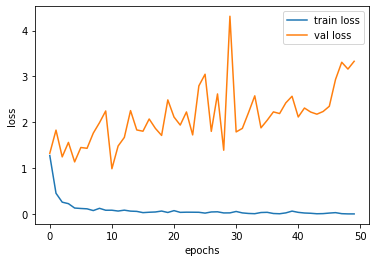

In [32]:
epochs = list(range(50))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Export Model

## Export TFLite

In [33]:
# import pathlib

# # Export the SavedModel
# export_dir = '/tmp/saved_model'
# tf.saved_model.save(model, export_dir)

# # Convert the model
# converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
# tflite_model = converter.convert()

# # Save the model
# tflite_model_file = pathlib.Path('/tmp/model.tflite')
# tflite_model_file.write_bytes(tflite_model)

## Export H5

In [34]:
# model.save('model.h5')

## Export SavedModel

In [35]:
import tempfile

MODEL_DIR = os.path.join(tempfile.gettempdir(), "saved_model")
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}
    
tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/saved_model/1



INFO:tensorflow:Assets written to: /tmp/saved_model/1/assets


INFO:tensorflow:Assets written to: /tmp/saved_model/1/assets



Saved model:
total 820
drwxr-xr-x 2 root root   4096 Jun 12 06:32 assets
-rw-r--r-- 1 root root  14963 Jun 12 06:32 keras_metadata.pb
-rw-r--r-- 1 root root 812949 Jun 12 06:32 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun 12 06:32 variables


## For Serving

In [36]:
# !saved_model_cli show --dir {export_path} --all

In [37]:
# import sys
# # We need sudo prefix if not on a Google Colab.
# if 'google.colab' not in sys.modules:
#   SUDO_IF_NEEDED = 'sudo'
# else:
#   SUDO_IF_NEEDED = ''

In [38]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

# !echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
# !{SUDO_IF_NEEDED} apt update

# !{SUDO_IF_NEEDED} apt-get install tensorflow-model-server

In [39]:
# os.environ["MODEL_DIR"] = MODEL_DIR
# print(MODEL_DIR)

# !nohup tensorflow_model_server \
#   --rest_api_port=8501 \
#   --model_name=emotion_model \
#   --model_base_path="{MODEL_DIR}" >server.log 2>&1

# !tail server.log

# Tests

In [40]:
from google.colab import files
file = files.upload()

Saving test_audio.wav to test_audio.wav


In [41]:
filename = './test_audio.wav'
Audio(filename)

## Predict Test

In [42]:
pred_feature = extract_mfcc(filename)
pred_feature = pred_feature.reshape(1, -1)
pred = model.predict(pred_feature)

In [43]:
def unique(lists):
    x = np.array(lists)
    return np.array(np.unique(x))
    
label = unique(df[['label']])
pred_ind = np.argmax(pred, axis=1)
pred_alphabet = [label[ind] for ind in pred_ind]
pred_alphabet

['disgust']

## Dump Test Data

In [44]:
import json

data = json.dumps({"signature_name": "serving_default",
                   "instances": pred_feature.tolist()})
data

'{"signature_name": "serving_default", "instances": [[-235.40335083007812, 164.40321350097656, -18.002443313598633, 37.708900451660156, 3.9001498222351074, 12.726917266845703, 18.509841918945312, -13.262979507446289, 15.129453659057617, -4.406682014465332, -10.287717819213867, 12.040298461914062, -3.2798590660095215, 2.7380826473236084, 1.218339443206787, -0.0339718759059906, 4.578472137451172, -8.284515380859375, 2.251260995864868, 2.5661239624023438, -3.6741280555725098, 2.883909225463867, -3.442270040512085, 1.6113113164901733, 1.3535497188568115, -2.3546555042266846, 5.341142177581787, -1.3458092212677002, -0.05562635511159897, 2.492805004119873, -2.018281936645508, 2.757107973098755, -0.7109004855155945, -0.8553957939147949, 0.788636326789856, -3.15958833694458, 0.809781014919281, -0.6439439058303833, -0.6129307150840759, 1.448660969734192]]}'